# Importing library and data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image

In [2]:
data = pd.read_csv("sales_train_evaluation.csv")

In [3]:
data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [6]:
#data.columns[6:]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [8]:
#lets see the states name involve in data
data["state_id"].unique()
#total no of count for all 3 states
data["state_id"].value_counts()

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

Observation: we have a lot of data from CA and WI and TX are same

# next we will finsd no of unique products,catogries,stores and department

In [9]:
#data["item_id"].isna().sum()

In [10]:
uniquie_items = data["item_id"].unique()
uniquie_items = len(uniquie_items)
#uniquie_items
print("total no of items present in data:   " , uniquie_items)


total no of items present in data:    3049


In [11]:
catogories = data["cat_id"].unique()
catogories = len(catogories)
print("total no of catogeries present in data:   " , catogories)

total no of catogeries present in data:    3


In [12]:
store = data["store_id"].unique()
#store
store = len(store)
print("total no of store:  ", store)

total no of store:   10


In [13]:
department = data["dept_id"].unique()
department = len(department)
print("total no of department in data:  ",department)

total no of department in data:   7


In [14]:

keys=pd.unique(data['cat_id'])
print('category of products',keys)
val=[]
for i in keys:
  ind=data.item_id[data['cat_id']==i]
  val.append(len(pd.unique(ind)))

category of products ['HOBBIES' 'HOUSEHOLD' 'FOODS']


In [15]:
val

[565, 1047, 1437]

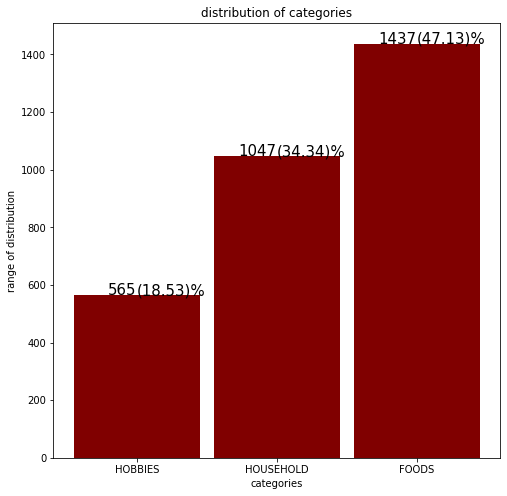

In [16]:
per=100/uniquie_items
plt.figure(figsize=(8,8))
plt.bar(keys, val, color ='maroon',width=.9)
plt.bar(keys, val, color ='maroon',width=.9)
for index,data in enumerate(val):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=15),ha='right')
    plt.text(x=index , y =data , s=f"({np.round(data*per,2)})%" , fontdict=dict(fontsize=15),ha='left')

plt.title('distribution of categories')
plt.xlabel('categories')
plt.ylabel('range of distribution')
plt.show()
     

# loading the calander data

In [17]:
calander = pd.read_csv("calendar.csv")
calander

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [18]:

calander.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [19]:
calander.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [20]:
calander = calander.fillna("no_event")
calander.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1


In [23]:
data = pd.read_csv("sales_train_evaluation.csv")
data.columns


"\neach_day_sale=data[days].sum().values\n\nfig=px.line(x=calander['date'][:1941],y=each_day_sale,title='sales occured on each day',labels={'x':'years','y':'sales'})\nfig.update_layout(title_x=.5)\nfig.show()\n"

In [24]:
data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

In [28]:
days=data.columns[6:]
each_day_sale=data[days].sum().values
print(each_day_sale)

fig=px.line(x=calander['date'][:1941],y=each_day_sale,title='sales occured on each day',labels={'x':'years','y':'sales'})
fig.update_layout(title_x=.5)
fig.show()

[32631 31749 23783 ... 42552 51518 54338]


In [ ]:
observation:
    
1.firstly thing observed is the pattern ,for each year it slighlty having same pattern

2.year by year sales increment in sales in slow but compare to 2011 , year 2016 as increase of sales up to range of 60k

3.At end of each year the sales are droping drastically

creating new dataframe taking up to 1941 days from calendar.csv